--- Dados de Carga Carregados ---
   Tempo  TensaoResistor  TensaoCapacitor
0      0            5.00             0.00
1    401            4.80             0.20
2    803            4.61             0.39
3   1206            4.43             0.57
4   1607            4.26             0.74

--- Dados de Descarga Carregados ---
   Tempo  TensaoCapacitor  TensaoResistor
0      0             1.91            3.09
1     52             1.81            3.19
2    104             1.72            3.28
3    157             1.63            3.37
4    209             1.55            3.45


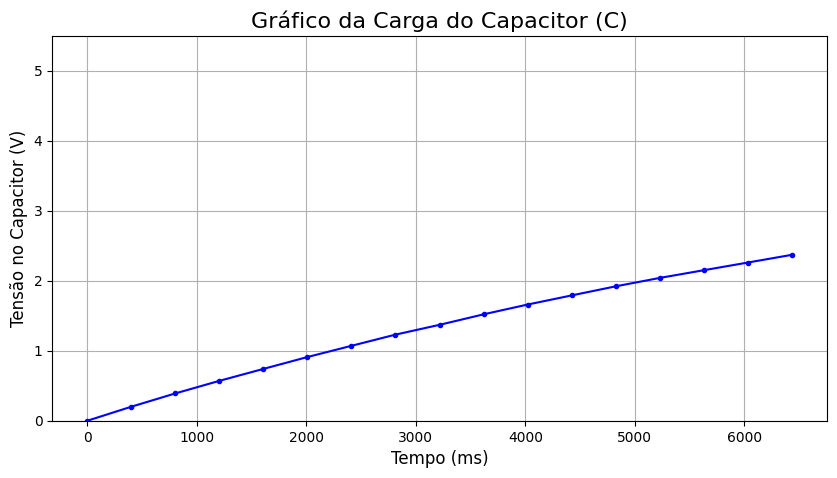

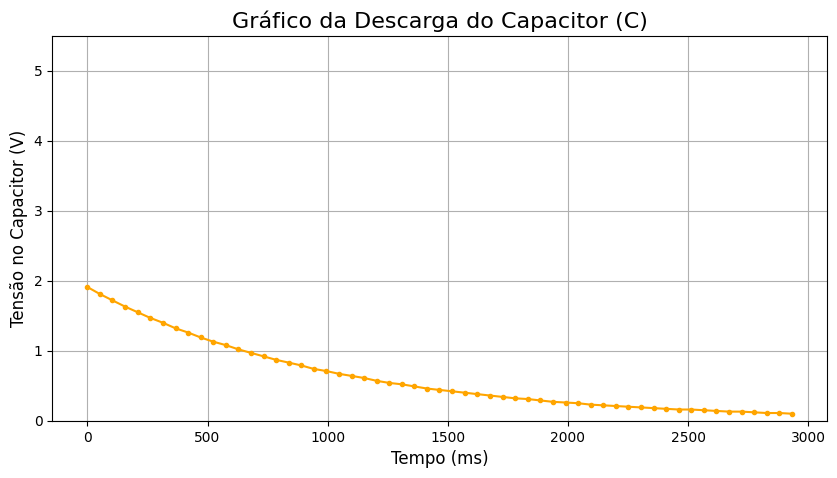

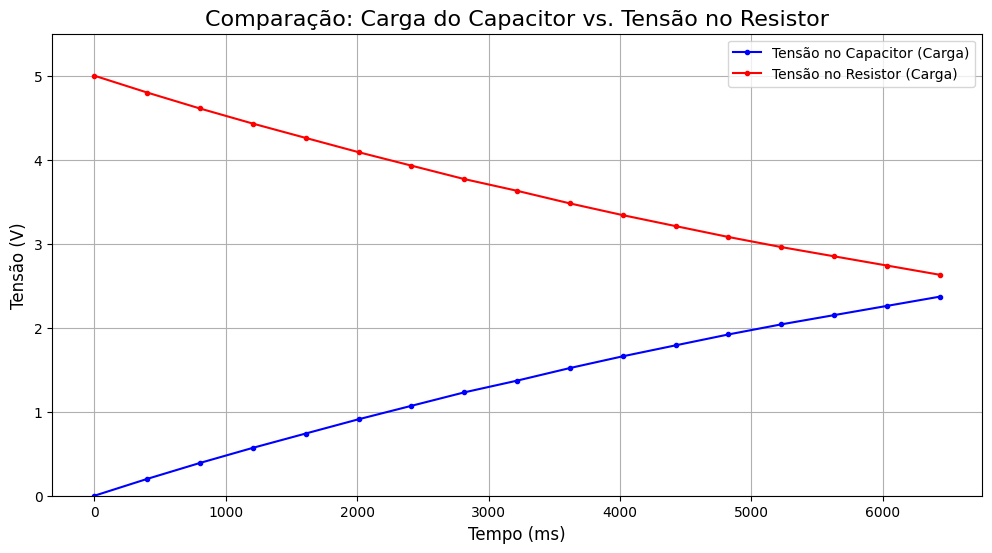

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# --- ETAPA 1: SEUS DADOS COLETADOS ESTÃO AQUI ---

# Seus dados da CURVA DE CARGA
dados_carga_csv = """
0; 5.00; 0.00
401; 4.80; 0.20
803; 4.61; 0.39
1206; 4.43; 0.57
1607; 4.26; 0.74
2010; 4.09; 0.91
2412; 3.93; 1.07
2814; 3.77; 1.23
3217; 3.63; 1.37
3619; 3.48; 1.52
4022; 3.34; 1.66
4423; 3.21; 1.79
4826; 3.08; 1.92
5228; 2.96; 2.04
5630; 2.85; 2.15
6033; 2.74; 2.26
6435; 2.63; 2.37
"""

# Seus dados da CURVA DE DESCARGA que você coletou anteriormente.
dados_descarga_csv = """
Tempo,TensaoCapacitor,TensaoResistor
900,1.91,3.09
952,1.81,3.19
1004,1.72,3.28
1057,1.63,3.37
1109,1.55,3.45
1161,1.47,3.53
1214,1.40,3.60
1267,1.32,3.68
1319,1.26,3.74
1371,1.19,3.81
1423,1.13,3.87
1476,1.08,3.92
1528,1.02,3.98
1580,0.97,4.03
1633,0.92,4.08
1685,0.87,4.13
1738,0.83,4.17
1790,0.79,4.21
1842,0.74,4.26
1894,0.71,4.29
1947,0.67,4.33
2000,0.64,4.36
2052,0.61,4.39
2104,0.57,4.43
2156,0.54,4.46
2209,0.52,4.48
2261,0.49,4.51
2313,0.46,4.54
2365,0.44,4.56
2419,0.42,4.58
2471,0.40,4.60
2523,0.38,4.62
2575,0.36,4.64
2628,0.34,4.66
2680,0.32,4.68
2732,0.31,4.69
2784,0.29,4.71
2837,0.27,4.73
2890,0.26,4.74
2942,0.25,4.75
2994,0.23,4.77
3046,0.22,4.78
3099,0.21,4.79
3151,0.20,4.80
3204,0.19,4.81
3256,0.18,4.82
3308,0.17,4.83
3361,0.16,4.84
3413,0.16,4.84
3465,0.15,4.85
3517,0.14,4.86
3570,0.13,4.87
3623,0.13,4.87
3675,0.12,4.88
3727,0.11,4.89
3780,0.11,4.89
3832,0.10,4.90
"""

# --- ETAPA 2: PROCESSAMENTO E GERAÇÃO DOS GRÁFICOS ---

# Lê os dados de carga, especificando o separador ";" e sem cabeçalho
df_carga = pd.read_csv(io.StringIO(dados_carga_csv), sep=';', header=None)
df_carga.columns = ['Tempo', 'TensaoResistor', 'TensaoCapacitor'] # Renomeia as colunas na ordem correta

# Lê os dados de descarga
df_descarga = pd.read_csv(io.StringIO(dados_descarga_csv))

# Ajusta o tempo da descarga para começar em zero
if not df_descarga.empty:
    df_descarga['Tempo'] = df_descarga['Tempo'] - df_descarga['Tempo'].iloc[0]

print("--- Dados de Carga Carregados ---")
print(df_carga.head())
print("\n--- Dados de Descarga Carregados ---")
print(df_descarga.head())


# --- GRÁFICO 1: Carga do Capacitor ---
plt.figure(figsize=(10, 5))
plt.plot(df_carga['Tempo'], df_carga['TensaoCapacitor'], marker='.', linestyle='-', color='blue')
plt.title('Gráfico da Carga do Capacitor (C)', fontsize=16)
plt.xlabel('Tempo (ms)', fontsize=12)
plt.ylabel('Tensão no Capacitor (V)', fontsize=12)
plt.grid(True)
plt.ylim(0, 5.5)
plt.show()


# --- GRÁFICO 2: Descarga do Capacitor ---
plt.figure(figsize=(10, 5))
plt.plot(df_descarga['Tempo'], df_descarga['TensaoCapacitor'], marker='.', linestyle='-', color='orange')
plt.title('Gráfico da Descarga do Capacitor (C)', fontsize=16)
plt.xlabel('Tempo (ms)', fontsize=12)
plt.ylabel('Tensão no Capacitor (V)', fontsize=12)
plt.grid(True)
plt.ylim(0, 5.5)
plt.show()


# --- GRÁFICO 3: Comparação (O Mais Importante!) ---
plt.figure(figsize=(12, 6))
plt.plot(df_carga['Tempo'], df_carga['TensaoCapacitor'], marker='.', linestyle='-', color='blue', label='Tensão no Capacitor (Carga)')
plt.plot(df_carga['Tempo'], df_carga['TensaoResistor'], marker='.', linestyle='-', color='red', label='Tensão no Resistor (Carga)')
plt.title('Comparação: Carga do Capacitor vs. Tensão no Resistor', fontsize=16)
plt.xlabel('Tempo (ms)', fontsize=12)
plt.ylabel('Tensão (V)', fontsize=12)
plt.legend()
plt.grid(True)
plt.ylim(0, 5.5)
plt.show()